# Homework 7, Part One: Lots and lots of questions about beer

### Do your importing and your setup

In [13]:
import pandas as pd

## Read in the file `craftcans.csv`, and look at the first first rows

In [14]:
df = pd.read_csv("craftcans.csv", na_values="Does not apply")
df.head(5)

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.50%,50.0
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.90%,26.0
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.80%,19.0
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.00%,38.0
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.00%,25.0


## How many rows do you have in the data? What are the column types?

In [15]:
df.shape

# 2,416 rows

(2416, 7)

In [16]:
df.dtypes

# Objects

Beer         object
Brewery      object
Location     object
Style        object
Size         object
ABV          object
IBUs        float64
dtype: object

# Checking out our alcohol

## What are the top 10 producers of cans of beer?

In [17]:
df.Brewery.value_counts().head(10)

Brewery Vivant                62
Oskar Blues Brewery           46
Sun King Brewing Company      38
Cigar City Brewing Company    25
Sixpoint Craft Ales           24
Hopworks Urban Brewery        23
Stevens Point Brewery         22
Great Crescent Brewery        20
21st Amendment Brewery        20
Bonfire Brewing Company       19
Name: Brewery, dtype: int64

## What is the most common ABV? (alcohol by volume)

In [18]:
df.ABV.mode()

0    5.00%
Name: ABV, dtype: object

## Oh, weird, ABV isn't a number. Convert it to a number for me, please.

It's going to take a few steps!

### First, let's just look at the ABV column by itself

In [19]:
df.ABV

0       4.50%
1       4.90%
2       4.80%
3       6.00%
4       6.00%
        ...  
2411    5.30%
2412    9.90%
2413    8.00%
2414    8.70%
2415    6.50%
Name: ABV, Length: 2416, dtype: object

### Hm, `%` isn't part of  a number. Let's remove it.

When you're confident you got it right, save the results back into the `ABV` column.

- *Tip: In programming the easiest way to remove something is to *replacing it with nothing*.
- *Tip: "nothing" might seem like `NaN` sinc we talked about it a lot in class, but in this case it isn't! It's just an empty string, like ""*
- *Tip: `.replace` is usually used for replacing ENTIRE cells, while `.str.replace` is useful for replacing PARTS of cells*

In [20]:
df.ABV.str.replace("%", "")

0       4.50
1       4.90
2       4.80
3       6.00
4       6.00
        ... 
2411    5.30
2412    9.90
2413    8.00
2414    8.70
2415    6.50
Name: ABV, Length: 2416, dtype: object

In [21]:
df.ABV = df.ABV.str.replace("%", "")

df.ABV

0       4.50
1       4.90
2       4.80
3       6.00
4       6.00
        ... 
2411    5.30
2412    9.90
2413    8.00
2414    8.70
2415    6.50
Name: ABV, Length: 2416, dtype: object

### Now let's turn `ABV` into a numeric data type

Save the results back into the `ABV` column (again), and then check `df.dtypes` to make sure it worked.

- *Tip: We used `.astype(int)` during class, but this has a decimal in it...*

In [25]:
df.ABV = df.ABV.astype(float)

df.ABV

0       4.5
1       4.9
2       4.8
3       6.0
4       6.0
       ... 
2411    5.3
2412    9.9
2413    8.0
2414    8.7
2415    6.5
Name: ABV, Length: 2416, dtype: float64

In [26]:
df.dtypes

Beer         object
Brewery      object
Location     object
Style        object
Size         object
ABV         float64
IBUs        float64
dtype: object

## What's the ABV of the average beer look like?

### Show me in two different ways: one command to show the `median`/`mean`/etc, and secondly show me a chart

In [27]:
df.ABV.mean().round(2)

5.98

<AxesSubplot:>

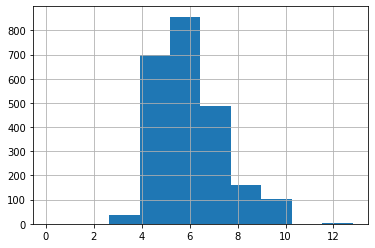

In [28]:
df.ABV.hist()

### We don't have ABV for all of the beers, how many are we missing them from?

- *Tip: You can use `isna()` or `notna()` to see where a column is missing/not missing data.*
- *Tip: You just want to count how many `True`s and `False`s there are.*
- *Tip: It's a weird trick involving something we usually use to count things in a column*

In [29]:
df[df.ABV.isna()]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
94,Bastian,James Page Brewing Company,"Stevens Point, WI",American Strong Ale,12 oz.,NaN,NaN
199,Professor Black,Blue Owl Brewing,"Austin, TX",American Stout,12 oz.,NaN,NaN
200,Little Boss,Blue Owl Brewing,"Austin, TX",American Pale Wheat Ale,12 oz.,NaN,NaN
201,Van Dayum!,Blue Owl Brewing,"Austin, TX",American Amber / Red Ale,12 oz.,NaN,NaN
202,Spirit Animal,Blue Owl Brewing,"Austin, TX",American Pale Ale (APA),12 oz.,NaN,NaN
...,...,...,...,...,...,...,...
2357,Lift Bridge Brown Ale,Keweenaw Brewing Company,"Houghton, MI",American Brown Ale,12 oz.,NaN,NaN
2358,Pick Axe Blonde Ale,Keweenaw Brewing Company,"Houghton, MI",American Blonde Ale,12 oz.,NaN,NaN
2359,Red Jacket Amber Ale,Keweenaw Brewing Company,"Houghton, MI",American Amber / Red Ale,12 oz.,NaN,NaN
2374,(16 oz.) (2010),NaN,NaN,NaN,NaN,NaN,NaN


# Looking at location

Brooklyn used to produce 80% of the country's beer! Let's see if it's still true.

## What are the top 10 cities in the US for canned craft beer?

In [30]:
df.Location.value_counts().head(10)

Grand Rapids, MI    66
Chicago, IL         55
Portland, OR        52
Indianapolis, IN    43
San Diego, CA       42
Boulder, CO         41
Denver, CO          40
Brooklyn, NY        38
Seattle, WA         35
Longmont, CO        33
Name: Location, dtype: int64

## List all of the beer from Brooklyn, NY

In [31]:
df[df.Location == 'Brooklyn, NY']

,Beer,Brewery,Location,Style,Size,ABV,IBUs
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.0,52.0
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.2,16.0
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.0,NaN
404,Nomader Weiss,Evil Twin Brewing,"Brooklyn, NY",Berliner Weissbier,12 oz.,4.0,NaN
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.2,7.0
439,Molotov Lite,Evil Twin Brewing,"Brooklyn, NY",American Double / Imperial IPA,16 oz.,8.5,NaN
588,Bengali,Sixpoint Craft Ales,"Brooklyn, NY",American IPA,"24 oz. ""Silo Can""",6.5,62.0
713,Sensi Harvest,Sixpoint Craft Ales,"Brooklyn, NY",American Pale Ale (APA),12 oz.,4.7,50.0
969,Hi-Res,Sixpoint Craft Ales,"Brooklyn, NY",American Double / Imperial IPA,12 oz.,9.9,111.0
987,KelSo Nut Brown Lager,KelSo Beer Company,"Brooklyn, NY",Euro Dark Lager,12 oz.,5.7,19.0


## What brewery in Brooklyn puts out the most types of canned beer?

In [32]:
df[df.Location == 'Brooklyn, NY'].groupby('Brewery').Beer.value_counts().sort_values(ascending=True)

Brewery              Beer                           
Sixpoint Craft Ales  Autumnation (2013)                 1
                     Bengali Tiger                      1
                     Bengali Tiger (2011)               1
                     Brownstone                         1
                     Diesel                             1
                     Global Warmer                      1
                     Harbinger                          1
                     Hi-Res                             1
                     Jammer                             1
                     Rad                                1
                     Resin                              1
                     Righteous Ale                      1
                     Righteous Ale (2011)               1
                     Sensi Harvest                      1
                     Sweet Action                       1
                     Sweet Action (2011)                1
                   

## What are the five styles of beer that Sixpoint produces the most cans of?

In [33]:
df[df.Brewery == 'Sixpoint Craft Ales'].groupby('Style').Beer.value_counts().sort_values(ascending=True)

Style                           Beer                        
American Brown Ale              Brownstone                      1
Rye Beer                        Righteous Ale                   1
Pumpkin Ale                     Autumnation (2011-12) (2011)    1
Gose                            Jammer                          1
German Pilsener                 The Crisp (2011)                1
                                The Crisp                       1
Fruit / Vegetable Beer          Rad                             1
Cream Ale                       Sweet Action (2011)             1
                                Sweet Action                    1
Belgian Pale Ale                Abigale                         1
Baltic Porter                   4Beans                          1
                                3Beans                          1
American Strong Ale             Global Warmer                   1
American Stout                  Diesel                          1
American Pale W

## List all of the breweries in New York state.

- *Tip: We want to match **part** of the `Location` column, but not all of it.*
- *Tip: Watch out for `NaN` values! You might be close, but you'll need to pass an extra parameter to make it work without an error.*

In [34]:
df[df.Location.str.contains("NY", na=False)]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.0,52.0
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.2,16.0
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.0,NaN
404,Nomader Weiss,Evil Twin Brewing,"Brooklyn, NY",Berliner Weissbier,12 oz.,4.0,NaN
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.2,7.0
...,...,...,...,...,...,...,...
2351,Brooklyn Lager (12 oz.),Brooklyn Brewery,"Brooklyn, NY",American Amber / Red Lager,12 oz.,5.2,NaN
2364,Heinnieweisse Weissebier,Butternuts Beer and Ale,"Garrattsville, NY",Hefeweizen,12 oz.,4.9,NaN
2365,Snapperhead IPA,Butternuts Beer and Ale,"Garrattsville, NY",American IPA,12 oz.,6.8,NaN
2366,Moo Thunder Stout,Butternuts Beer and Ale,"Garrattsville, NY",Milk / Sweet Stout,12 oz.,4.9,NaN


### Now *count* all of the breweries in New York state

In [35]:
df.Location.str.contains("NY", na=False).value_counts()

False    2342
True       74
Name: Location, dtype: int64

# Measuring International Bitterness Units

## Display all of the IPAs

Include American IPAs, Imperial IPAs, and anything else with "IPA in it."

IPA stands for [India Pale Ale](https://www.bonappetit.com/story/ipa-beer-styles), and is probably the most popular kind of beer in the US for people who are drinking [craft beer](https://www.craftbeer.com/beer/what-is-craft-beer).

In [36]:
df[df.Style.str.contains("IPA", na=False)]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.5,50.0
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.0,68.0
14,Rico Sauvin,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,7.6,68.0
17,Pile of Face,Against the Grain Brewery,"Louisville, KY",American IPA,16 oz.,6.0,65.0
24,Habitus (2014),Mike Hess Brewing Company,"San Diego, CA",American Double / Imperial IPA,16 oz.,8.0,100.0
...,...,...,...,...,...,...,...
2403,Abrasive Ale,Surly Brewing Company,"Brooklyn Center, MN",American Double / Imperial IPA,16 oz.,9.7,120.0
2406,Furious,Surly Brewing Company,"Brooklyn Center, MN",American IPA,16 oz.,6.2,99.0
2408,Brew Free! or Die IPA,21st Amendment Brewery,"San Francisco, CA",American IPA,12 oz.,7.0,65.0
2412,GUBNA Imperial IPA,Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,9.9,100.0


IPAs are usually pretty hoppy and bitter (although I guess hazy IPAs and session IPAs are changing that since I first made this homework!). IBU stands for [International Bitterness Unit](http://www.thebrewenthusiast.com/ibus/), and while a lot of places like to brag about having the most bitter beer (it's an American thing!), IBUs don't necessary *mean anything*.

Let's look at how different beers have different IBU measurements.

## Try to get the average IBU measurement across all beers

In [39]:
df.IBUs.mean().round(1)

42.7

### Oh no, it doesn't work!

It looks like some of those values *aren't numbers*. There are two ways to fix this:

1. Do the `.replace` and `np.nan` thing we did in class. Then convert the column to a number. This is boring.
2. When you're reading in your csv, there [is an option called `na_values`](http://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.read_csv.html). You can give it a list of **numbers or strings to count as `NaN`**. It's a lot easier than doing the `np.nan` thing, although you'll need to go add it up top and run all of your cells again.

- *Tip: Make sure you're giving `na_values` a LIST, not just a string*

### Now try to get the average IBUs again

In [41]:
df.IBUs.mean().round(1)

42.7

## Draw the distribution of IBU measurements, but with *twenty* bins instead of the default of 10

- *Tip: Every time I ask for a distribution, I'm looking for a histogram*
- *Tip: Use the `?` to get all of the options for building a histogram*

<AxesSubplot:>

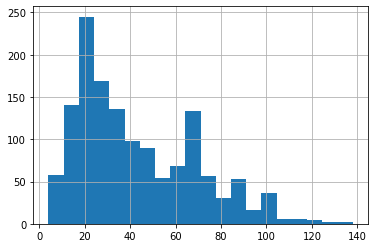

In [45]:
df.IBUs.hist(bins = 20)

## Hm, Interesting distribution. List all of the beers with IBUs above the 75th percentile

- *Tip: There's a single that gives you the 25/50/75th percentile*
- *Tip: You can just manually type the number when you list those beers*

<AxesSubplot:>

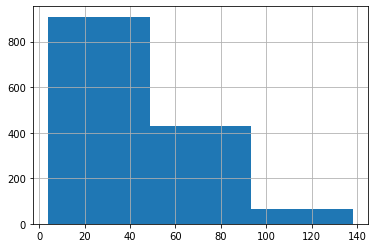

In [46]:
df.IBUs.hist(bins = 3)

In [108]:
df.groupby(by='Beer').IBUs.quantile(0.75).sort_values(ascending=False)

Beer
Bitter Bitch Imperial IPA                 138.0
Troopers Alley IPA                        135.0
Dead-Eye DIPA                             130.0
Bay of Bengal Double IPA (2014)           126.0
Heady Topper                              120.0
                                          ...  
Yunkin' Punkin'                             NaN
Zaison                                      NaN
Zaison (2012)                               NaN
oSKAr the G'Rauch                           NaN
the Kimmie, the Yink and the Holy Gose      NaN
Name: IBUs, Length: 2306, dtype: float64

In [64]:
df['IBUs'].quantile([0.25, 0.5, 0.75])

0.25    21.0
0.50    35.0
0.75    64.0
Name: IBUs, dtype: float64

## List all of the beers with IBUs below the 25th percentile

In [104]:
df.groupby(by='Beer').IBUs.quantile(0.25).sort_values(ascending=True)

Beer
Summer Solstice Cerveza Crema (2009)      4.0
Summer Solstice (2011)                    4.0
Summer Solstice                           4.0
Westbrook Gose                            5.0
Yo Soy Un Berliner                        5.0
                                         ... 
Yunkin' Punkin'                           NaN
Zaison                                    NaN
Zaison (2012)                             NaN
oSKAr the G'Rauch                         NaN
the Kimmie, the Yink and the Holy Gose    NaN
Name: IBUs, Length: 2306, dtype: float64

## List the median IBUs of each type of beer. Graph it.

Put the highest at the top, and the missing ones at the bottom.

- Tip: Look at the options for `sort_values` to figure out the `NaN` thing. The `?` probably won't help you here.

In [80]:
df.groupby(by='Style').IBUs.median().sort_values(ascending=False, na_position='last')

Style
American Barleywine                   96.0
Russian Imperial Stout                94.0
American Double / Imperial IPA        91.0
American Double / Imperial Pilsner    85.0
American Black Ale                    73.0
                                      ... 
Kristalweizen                          NaN
Low Alcohol Beer                       NaN
Mead                                   NaN
Rauchbier                              NaN
Shandy                                 NaN
Name: IBUs, Length: 99, dtype: float64

In [82]:
median_IBUs = df.groupby(by='Style').IBUs.median().sort_values(ascending=False, na_position='last')
median_IBUs

Style
American Barleywine                   96.0
Russian Imperial Stout                94.0
American Double / Imperial IPA        91.0
American Double / Imperial Pilsner    85.0
American Black Ale                    73.0
                                      ... 
Kristalweizen                          NaN
Low Alcohol Beer                       NaN
Mead                                   NaN
Rauchbier                              NaN
Shandy                                 NaN
Name: IBUs, Length: 99, dtype: float64

<AxesSubplot:xlabel='Style'>

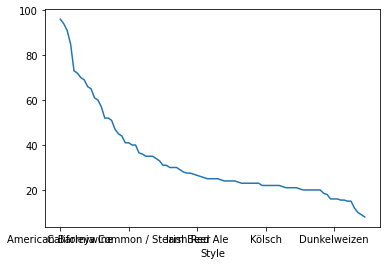

In [98]:
median_IBUs.plot()

## Hmmmm, it looks like they are generally different styles. What are the most common 5 styles of high-IBU beer vs. low-IBU beer?

- *Tip: You'll want to think about it in three pieces - filtering to only find the specific beers beers, then finding out what the most common styles are, then getting the top 5.*
- *Tip: You CANNOT do this in one command. It's going to be one command for the high and one for the low.*
- *Tip: "High IBU" means higher than 75th percentile, "Low IBU" is under 25th percentile*

In [99]:
df.groupby(by='Style').IBUs.quantile(0.25).sort_values(ascending=True)

Style
Berliner Weissbier         6.0
Gose                       6.5
American Adjunct Lager     9.0
Fruit / Vegetable Beer    10.0
Light Lager               11.0
                          ... 
Kristalweizen              NaN
Low Alcohol Beer           NaN
Mead                       NaN
Rauchbier                  NaN
Shandy                     NaN
Name: IBUs, Length: 99, dtype: float64

In [109]:
Low_IBU = df.groupby(by='Style').IBUs.quantile(0.25).sort_values(ascending=True)
Low_IBU.head(5)

Style
Berliner Weissbier         6.0
Gose                       6.5
American Adjunct Lager     9.0
Fruit / Vegetable Beer    10.0
Light Lager               11.0
Name: IBUs, dtype: float64

In [110]:
High_IBU = df.groupby(by='Style').IBUs.quantile(0.75).sort_values(ascending=False)
High_IBU.head(5)

Style
American Double / Imperial IPA        102.00
American Barleywine                    98.00
Russian Imperial Stout                 98.00
American Double / Imperial Pilsner     85.00
American Black Ale                     81.25
Name: IBUs, dtype: float64

## Get the average IBU of "Witbier", "Hefeweizen" and "American Pale Wheat Ale" styles

I'm counting these as wheat beers. If you see any other wheat beer categories, feel free to include them. I want ONE measurement and ONE graph, not three separate ones. And 20 to 30 bins in the histogram, please.

df[- *Tip: I hope that `isin` is in your toolbox*

In [149]:
df.Style.isin(['Witbier', 'Hefeweizen', 'American Pale Wheat Ale'])

0       False
1       False
2       False
3       False
4       False
        ...  
2411    False
2412    False
2413    False
2414    False
2415    False
Name: Style, Length: 2416, dtype: bool

In [159]:
df[(df.Style == 'Witbier') | (df.Style == 'Hefeweizen') | (df.Style == 'American Pale Wheat Ale')].IBUs.mean().round(1)

19.0

## Draw a histogram of the IBUs of those beers

<AxesSubplot:>

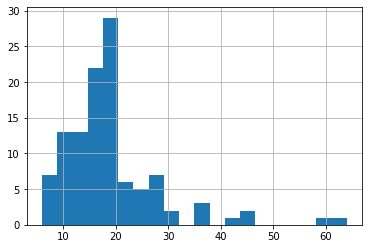

In [164]:
df[(df.Style == 'Witbier') | (df.Style == 'Hefeweizen') | (df.Style == 'American Pale Wheat Ale')].IBUs.hist(bins = 20)

## Get the average IBU of any style with "IPA" in it (also draw a histogram)

In [166]:
df[df.Style.str.contains("IPA", na=False)].IBUs.mean().round(2)

71.95

<AxesSubplot:>

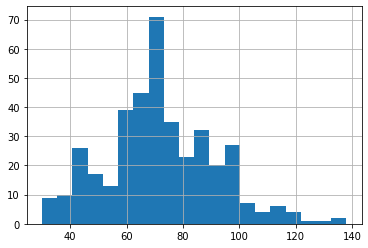

In [168]:
df[df.Style.str.contains("IPA", na=False)].IBUs.hist(bins = 20)

## Plot those two histograms on top of one another

To plot two plots on top of one another, you *might* just be able to plot twice in the same cell. It depends on your version of pandas/matplotlib! If it doesn't work, you'll need do two steps.

1. First, you make a plot using `plot` or `hist`, and you save it into a variable called `ax`.
2. You draw your second graph using `plot` or `hist`, and send `ax=ax` to it as a parameter.

It would look something like this:

```python
ax = df.plot(....)
df.plot(ax=ax, ....)
``` 

And then youull get two plots on top of each other. They won't be perfect because the bins won't line up without extra work, but it's fine!

<AxesSubplot:>

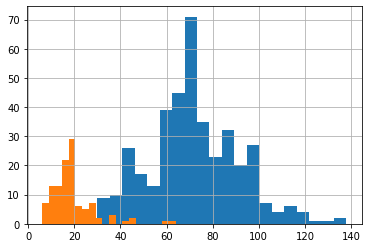

In [170]:
df[df.Style.str.contains("IPA", na=False)].IBUs.hist(bins = 20)
df[(df.Style == 'Witbier') | (df.Style == 'Hefeweizen') | (df.Style == 'American Pale Wheat Ale')].IBUs.hist(bins = 20)

## Compare the ABV of wheat beers vs. IPAs : their IBUs were really different, but how about their alcohol percentage?

Wheat beers might include witbier, hefeweizen, American Pale Wheat Ale, and anything else you think is wheaty. IPAs probably have "IPA" in their name.

<AxesSubplot:>

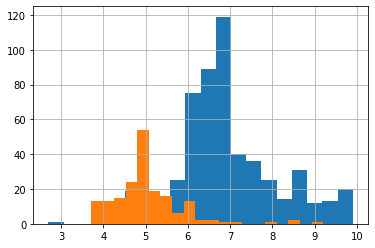

In [171]:
df[df.Style.str.contains("IPA", na=False)].ABV.hist(bins = 20)
df[(df.Style == 'Witbier') | (df.Style == 'Hefeweizen') | (df.Style == 'American Pale Wheat Ale')].ABV.hist(bins = 20)

## Good work!

For making it this far, your reward is my recommendation for Athletic Brewing Co.'s products as the best non-alcoholic beer on the market. Their Run Wild IPA and Upside Dawn are both very solid.

In [ ]:
# happy hour